In [47]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from bentdna import shapefourier
from bentdna import fourier_animation
workfolder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'

### Part 1: Initialize

In [48]:
host = 'atat_21mer'
s_agent = shapefourier.ShapeAgent(workfolder, host)
generator = fourier_animation.DataFrameGenerator(workfolder, host)

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists


### Part 2: Read $l_i$ and $\theta$

In [49]:
s_agent.read_l_modulus_theta()

### Part 3: Generate DataFrame

In [14]:
last_frame = 5
for label in generator.fname_suffix:
    df_animation = generator.make_df(label, s_agent, last_frame)

Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_MD.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n0to9.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n1.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n2.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n3.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n4.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n5.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/pnas_16mer/an_folder/animation_n6.csv
Write DataFrame to /home/yizaochen/codes/dna_

### Part 3: Plot required functions

In [50]:
def get_slist_cos_list(n, frame_id, s_agent):
    df_filter = s_agent.get_filter_df(frame_id)
    s_list, cos_list = s_agent.get_mode_shape_list(n, df_filter)
    return s_list, cos_list

### Part 4: Assemble and Original

In [29]:
n = 100
frame_id = 1
df_filter = s_agent.get_filter_df(frame_id)
an = s_agent.get_an(n, df_filter)
an

-0.08728984649525733

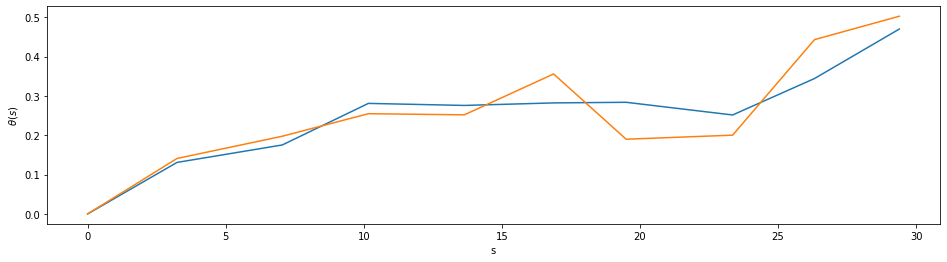

In [46]:
# Ad-hoc variables
frame_id = 1
n_begin = 0
n_end = 14

s_list, theta_list = s_agent.get_slist_thetalist(frame_id)
s_list, appr_theta_list = s_agent.get_approximate_theta(frame_id, n_begin, n_end)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
ax.plot(s_list, theta_list, label='original')
ax.plot(s_list, appr_theta_list, label='approximate')
ax.set_xlabel("s")
ax.set_ylabel(r"$\theta(s)$")

plt.show()

### Part 5: Decompose

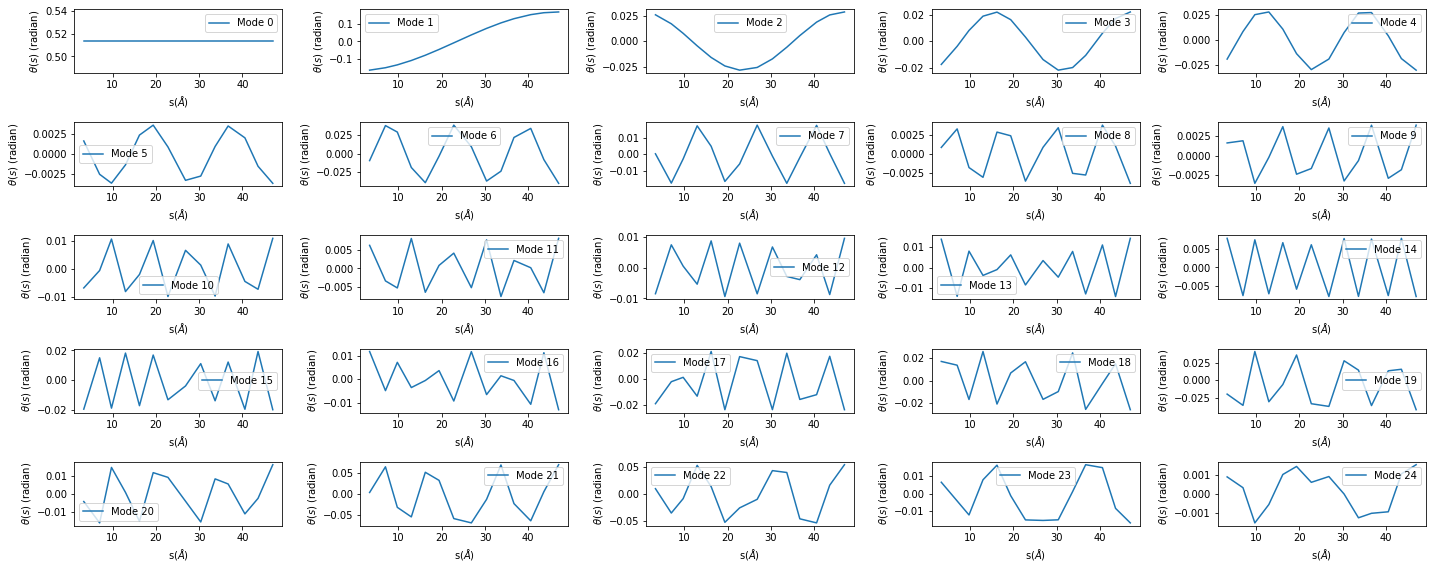

In [51]:
# Ad-hoc variables
frame_id = 1

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,8))

n = 0
for row_id in range(5):
    for col_id in range(5):
        s_list, cos_list = get_slist_cos_list(n, frame_id, s_agent)
        ax = axes[row_id, col_id]
        ax.plot(s_list, cos_list, label=f"Mode {n}")
        ax.set_ylabel(r"$\theta(s)$ (radian)")
        ax.set_xlabel(r"s($\AA$)")
        ax.legend()
        n += 1
plt.tight_layout()
plt.show()

In [52]:
s_list, cos_list = get_slist_cos_list(24, frame_id, s_agent)

In [54]:
s_list

array([ 3.32592773,  6.98918939,  9.729635  , 12.96574616, 16.19755101,
       19.37150669, 22.78097129, 26.84136796, 30.35954261, 33.68133688,
       36.69373012, 40.56958342, 43.6035974 , 47.01325226])

In [7]:
import plotly.express as px

In [5]:
df_animation.head(15)

,frame_id,s,theta(s),label,a_n
0,1,0.000000,0.000000,n=7,-0.008532
1,1,3.234892,0.278180,n=7,-0.008532
2,1,7.048284,0.269145,n=7,-0.008532
3,1,10.165363,0.271168,n=7,-0.008532
4,1,13.639663,0.277891,n=7,-0.008532
5,1,16.871978,0.265867,n=7,-0.008532
6,1,19.499336,0.275977,n=7,-0.008532
7,1,23.354815,0.271517,n=7,-0.008532
8,1,26.320464,0.268222,n=7,-0.008532
9,1,29.389608,0.279932,n=7,-0.008532


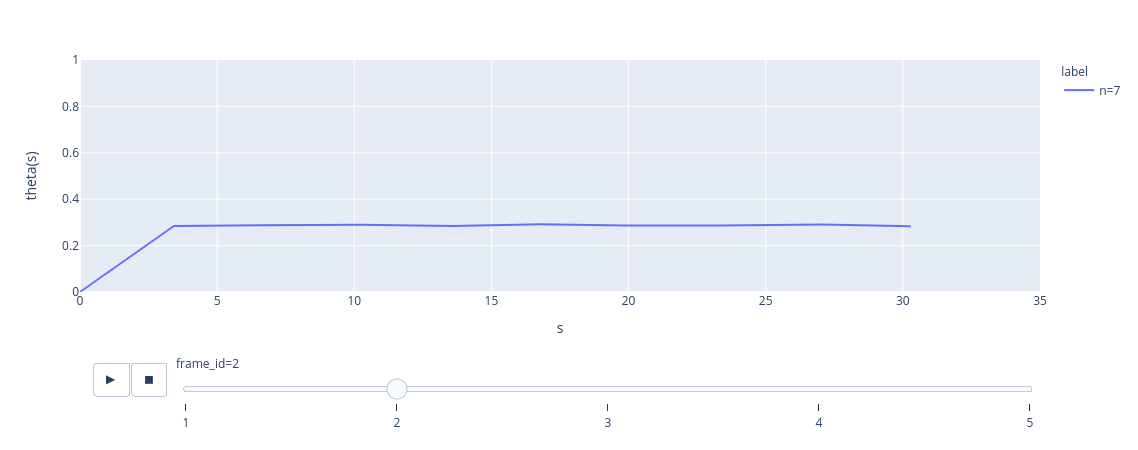

In [13]:
px.line(df_animation, x="s", y="theta(s)", animation_frame="frame_id", animation_group="label",
        color="label", hover_name="a_n", range_x=[0,35], range_y=[0,1])

### Addtional Part : Batch Generate

In [15]:
workfolder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'
hosts = ['atat_21mer', 'g_tract_21mer', 'a_tract_21mer', 
         'gcgc_21mer', 'tgtg_21mer', 'ctct_21mer',
         'pnas_16mer', 'yizao_model']
last_frame = 10000

for host in hosts:
    s_agent = shapefourier.ShapeAgent(workfolder, host)
    generator = fourier_animation.DataFrameGenerator(workfolder, host)
    s_agent.read_l_modulus_theta()
    for label in generator.fname_suffix:
        df_animation = generator.make_df(label, s_agent, last_frame)

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_MD.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_n0to9.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_n1.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_n2.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_n3.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_n4.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/animation_n5.csv
Write DataFrame to /home/yizaochen/codes/dna_rna/length_effect/find_helica